In [2]:
# I need to call all the data in the scattering matrices and make them into a HDF5 file
import numpy as np
import h5py
import os
import sys
# Importing the necessary libraries
from complex_network.networks.network_spec import NetworkSpec
from complex_network.networks.network_factory import generate_network
from matplotlib import pyplot as plt
import json

KeyError: '0,1'

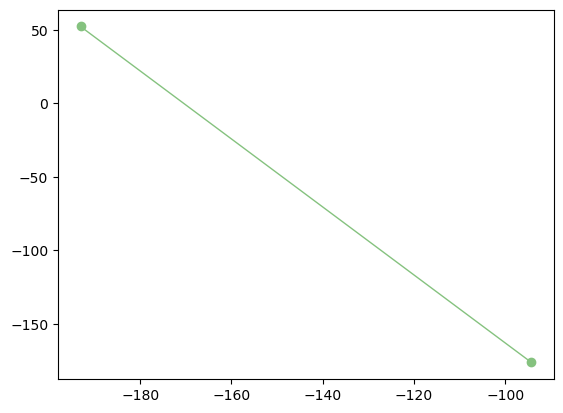

In [53]:
network_type = 'buffon'
network_shape = 'circular'
ne = 10
random_seed = 8322

network_spec = NetworkSpec(network_type=network_type,
                            network_shape=network_shape,
                            random_seed=random_seed,
                            num_external_nodes=ne)

network = generate_network(network_spec)
network.draw()
print(network.get_S_ee(1.0))

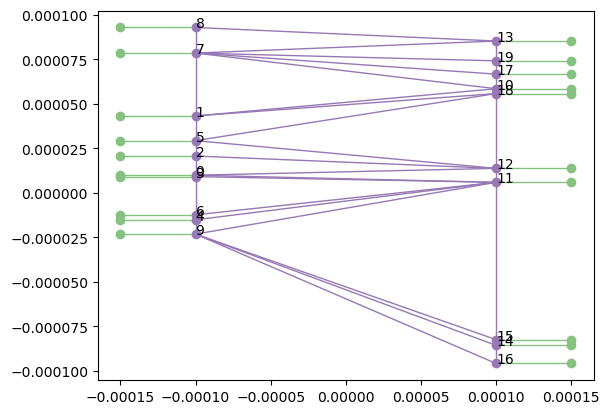

In [44]:
network_type = 'delaunay'
network_shape = 'slab'
random_seed = 0
num_internal_nodes = 20
num_external_nodes = 10
num_seed_nodes = None
network_size = (200e-6,200e-6)
external_size = 250e-6
external_offset = 50e-6

network_spec = NetworkSpec(network_type=network_type,
                            network_shape=network_shape,
                            random_seed=random_seed,
                            num_internal_nodes=num_internal_nodes,
                            num_external_nodes=num_external_nodes,
                            num_seed_nodes=num_seed_nodes,
                            network_size=network_size,
                            external_size=external_size,
                            external_offset=external_offset)

network = generate_network(network_spec)
network.draw(show_internal_indices=True)
S_ii = network.get_S_ii(1.0)
S_ie = network.get_S_ie(1.0)
S_ee = network.get_S_ee(1.0)
plt.show()

# help(network)


In [23]:
import numpy as np

def extract_blocks(M):
    """Extracts square blocks from a block diagonal matrix M."""
    n = M.shape[0]
    blocks = []
    indices = []
    i = 0
    while i < n:
        # Find the size of the next block
        block_size = np.count_nonzero(M[i])  # Assumes block has full rows
        blocks.append(M[i:i+block_size, i:i+block_size])
        indices.append((i, i + block_size - 1))  # Store index range
        i += block_size  # Move to the next block
    return blocks, indices

def find_block_index(row, indices):
    """Finds the block index containing the given row."""
    for i, (start, end) in enumerate(indices):
        if start <= row <= end:
            return i  # Block index
    return None  # Row not in any block


blocks, indices = extract_blocks(S_ii)

row_index = 32
block_idx = find_block_index(row_index, indices)
print(f"Row {row_index} belongs to block {block_idx}")


Row 32 belongs to block 6
